In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

#Load ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing 
#from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
#from sklearn.linear_model import LogisticRegression

In [2]:
file = open('logins.json')

In [3]:
login_time = json.load(file)

In [4]:
df = pd.DataFrame(login_time)

In [5]:
df.head(20)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [6]:
# Convert the login_time column to datetime type
df['login_time'] = pd.to_datetime(df['login_time'])


In [7]:
# Set the login_time column as the index
df.set_index('login_time', inplace=True)

In [8]:
# Resample the data to 15-minute intervals
df_resampled = df.resample('15T').size()

In [9]:
df_resampled.head(20)

login_time
1970-01-01 20:00:00     2
1970-01-01 20:15:00     6
1970-01-01 20:30:00     9
1970-01-01 20:45:00     7
1970-01-01 21:00:00     1
1970-01-01 21:15:00     4
1970-01-01 21:30:00     0
1970-01-01 21:45:00     4
1970-01-01 22:00:00     9
1970-01-01 22:15:00     8
1970-01-01 22:30:00     1
1970-01-01 22:45:00     3
1970-01-01 23:00:00    16
1970-01-01 23:15:00    13
1970-01-01 23:30:00    14
1970-01-01 23:45:00    15
1970-01-02 00:00:00    10
1970-01-02 00:15:00    18
1970-01-02 00:30:00    12
1970-01-02 00:45:00    13
Freq: 15T, dtype: int64

In [10]:
df_resampled = pd.DataFrame(df_resampled)

In [11]:
df_resampled.head(10)

,0
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


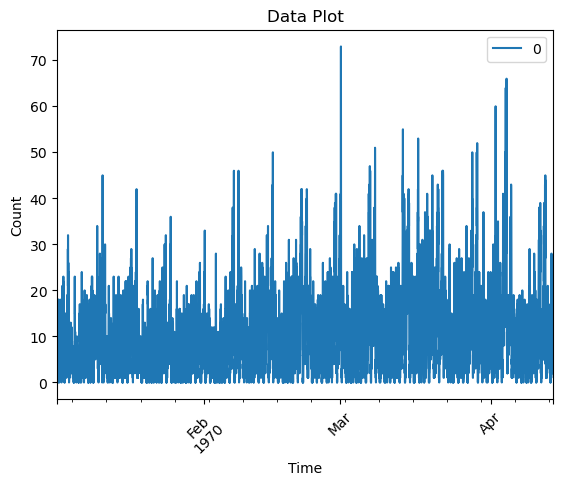

In [12]:
# Plot the resampled data
df_resampled.plot()
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Data Plot')
plt.xticks(rotation=45)
plt.show()

From the graph it appears that peak login times are March, but it is hard to tell.  

In [13]:
df_resampled.describe()

,0
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [14]:
df_resampled.idxmax(axis=0, skipna=True)

0   1970-03-01 04:30:00
dtype: datetime64[ns]

In [15]:
df_resampled.idxmin(axis=0, skipna=True)

0   1970-01-01 21:30:00
dtype: datetime64[ns]

In [16]:
#calculate usage for month of January
count = 31*24*(60/15)

In [17]:
print(count)

2976.0


Text(0, 0.5, 'Count')

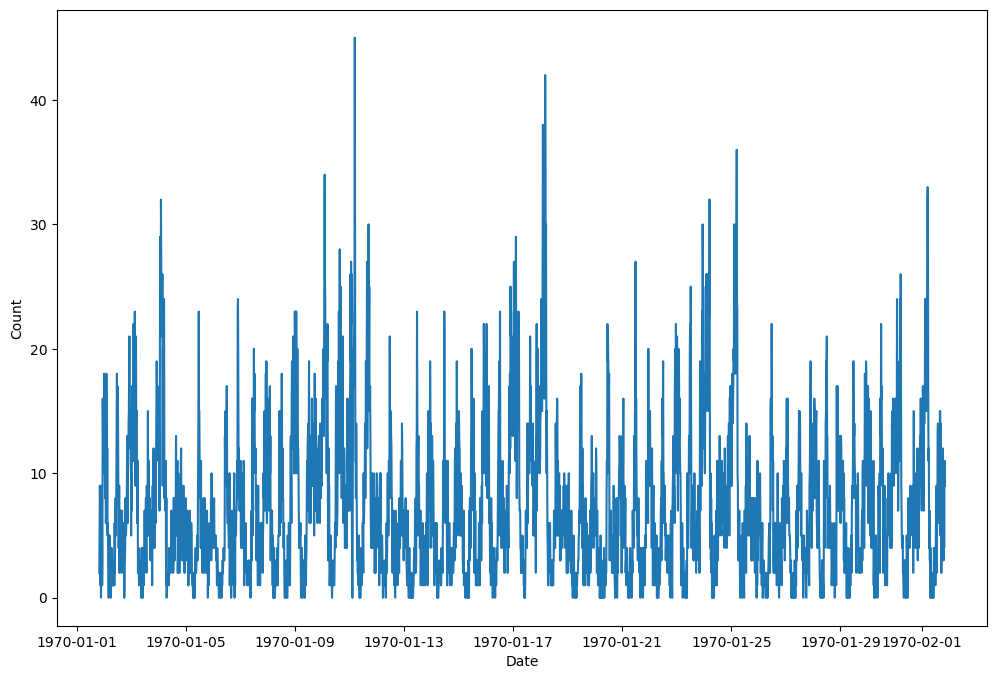

In [18]:
plt.figure(figsize=(12,8))
plt.plot(df_resampled[0:2976])
plt.xlabel('Date')
plt.ylabel('Count')

Looks like cyclical usage for January

In [19]:
df_resampled[0:2976].idxmax(axis=0, skipna=True)

0   1970-01-11 04:45:00
dtype: datetime64[ns]

In [20]:
#Calc ussage for first week of month
7*24*(60/15)

672.0

Text(0, 0.5, 'Count')

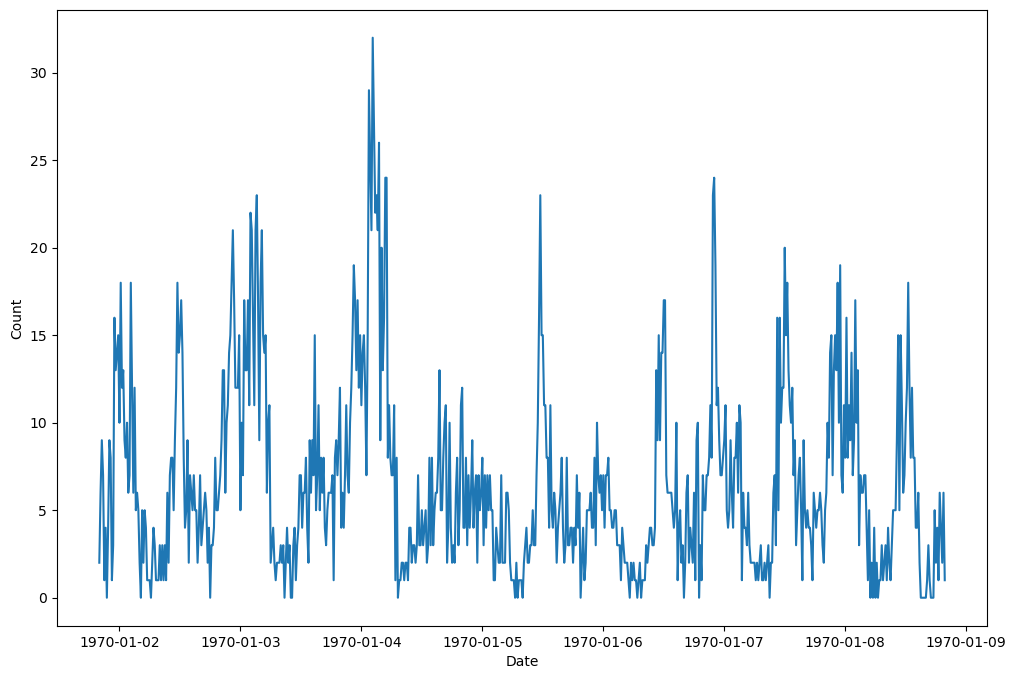

In [21]:
plt.figure(figsize=(12,8))
plt.plot(df_resampled[0:672])
plt.xlabel('Date')
plt.ylabel('Count')

Appears cyclic in nature even for the first week of January.

Text(0, 0.5, 'Count')

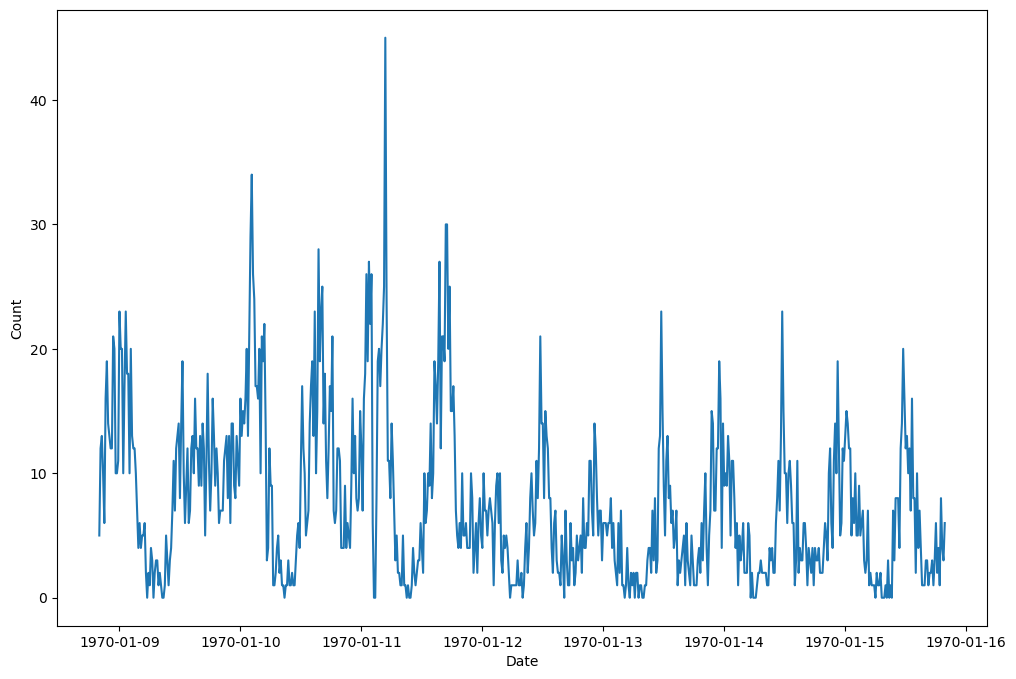

In [22]:
plt.figure(figsize=(12,8))
plt.plot(df_resampled[672:1344])
plt.xlabel('Date')
plt.ylabel('Count')

It appears that Sundays are the max days of traffic.

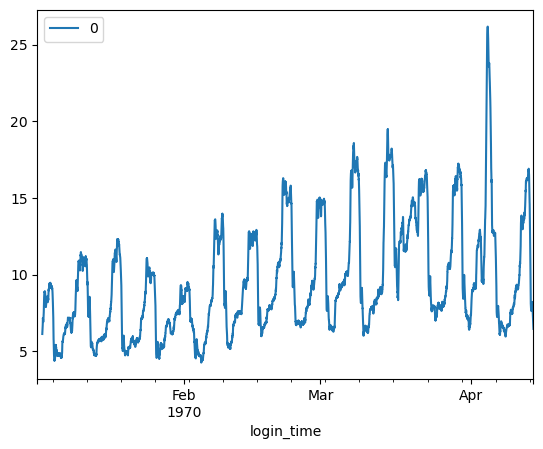

In [23]:
df_resampled.rolling(window=96).mean().plot()
plt.show()

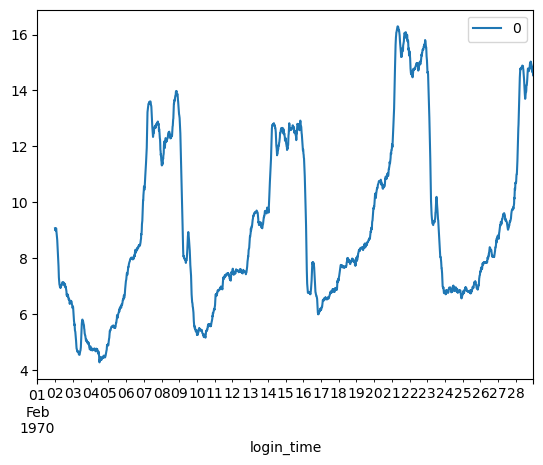

In [24]:
df_resampled.loc['1970-02'].rolling(window=96).mean().plot()
plt.show()

Usage goes up toward the end of the week.  Weekends traffic is higher.

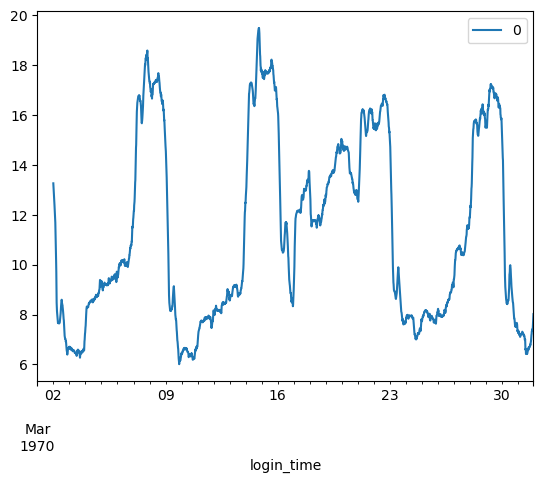

In [25]:
df_resampled.loc['1970-03'].rolling(window=96).mean().plot()
plt.show()

Again, it appears that traffic builds up toward the end of week.

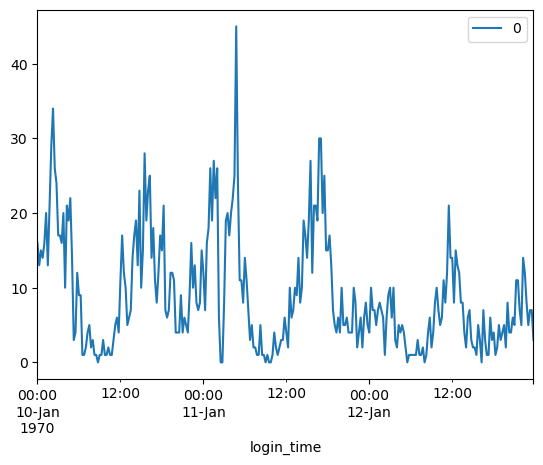

In [26]:
df_resampled.loc['1970-01-10':'1970-01-12' ].plot()
plt.show()

Peak times are at Lunch time and when it is last call at the bars (1-2am).

1)	What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
    I would choose to measure the toll booth payments as this would give information about where the drivers are located and how much time they spend between the two cities.  In addition to payment, you would be able to gather information such as date and time and the direction they are traveling as the cross the tollbooth.   Success would be if the drivers are spending equal amounts of time between the two cities. 

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment
    I would measure tollbooth activity for each driver for a period during the experiment of tollbooth reimbursement to see how much time each driver is spending in the two cities. 

b) what statistical test(s) you will conduct to verify the significance of the observation
    I would use a t-test to calculate p-value to determine if there is a significant difference in time between the location and time between the tollbooth reimbursement data set vs the non-tollbooth reimbursement data set. 
c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    If there was a statistically significant change in the amount of time the drivers were spending between the two cities by offering the reimbursement for tolls then I would recommend that change to city officials.  One caveat, is that we may have a change in the time and location the drivers are spending in each location, but it might not produce the desired effect of having each driver spend equal amount of time between each city as desired. 


In [27]:
file2 = open('ultimate_data_challenge.json')

In [28]:
df2 = json.load(file2)

In [29]:
df2 = pd.DataFrame(df2)

In [30]:
df2.head(20)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [31]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [32]:
df2.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [33]:
df2.duplicated().value_counts()

False    49992
True         8
dtype: int64

Looks like we have 8 duplicate rows and some columns that have missing values.

In [34]:
df2=df2.drop_duplicates()

In [35]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [36]:
df2.duplicated().value_counts()

False    49992
dtype: int64

In [37]:
df2.avg_rating_of_driver.describe()

count    41873.000000
mean         4.601512
std          0.617360
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [38]:
df2.avg_rating_of_driver.head()

0    4.7
1    5.0
2    4.3
3    4.6
4    4.4
Name: avg_rating_of_driver, dtype: float64

In [39]:
mean_avg_rating_of_driver = df2.avg_rating_of_driver.mean()

In [40]:
df2.avg_rating_of_driver = df2['avg_rating_of_driver'].fillna(mean_avg_rating_of_driver)

In [41]:
mean_avg_rating_by_driver=df2.avg_rating_by_driver.mean()

In [42]:
df2.avg_rating_by_driver = df2['avg_rating_by_driver'].fillna(mean_avg_rating_by_driver)

In [43]:
df2.phone.head(20)

0      iPhone
1     Android
2      iPhone
3      iPhone
4     Android
5      iPhone
6     Android
7      iPhone
8     Android
9     Android
10     iPhone
11     iPhone
12     iPhone
13     iPhone
14    Android
15    Android
16    Android
17     iPhone
18     iPhone
19     iPhone
Name: phone, dtype: object

In [44]:
df2.phone.describe()

count      49596
unique         2
top       iPhone
freq       34578
Name: phone, dtype: object

In [45]:
df2.phone = df2['phone'].fillna('iPhone')

I filled the missing values for the avg driver ratings with the mean rating value.  For phone type I used Iphone for the missing value because Iphone was the most common value.

In [46]:
df2.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [47]:
df2.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [48]:
df2['signup_date'] = pd.to_datetime(df2['signup_date'])

In [49]:
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])

In [50]:
current_date = df2['last_trip_date'].max()

In [51]:
current_date

Timestamp('2014-07-01 00:00:00')

In [52]:
active = (df2.last_trip_date >= '2014-06-01').sum()
print('The number of drivers active in final month:', active)
count = len(df2)
print('The number of drivers in 6-month assessment period: ',count)
fraction_retained = active / count
print('The percentage of drivers retained over period:', (round(fraction_retained*100)))

The number of drivers active in final month: 18804
The number of drivers in 6-month assessment period:  49992
The percentage of drivers retained over period: 38


In [53]:
# create column with dummy variable for driver retained or not
df2['retained'] = (df2['last_trip_date'] >= pd.to_datetime('2014-06-01')).astype(int)

/var/folders/j5/np658np12vl9nkcgdxj9xmv00000gn/T/ipykernel_2299/3278540041.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df2.corr())


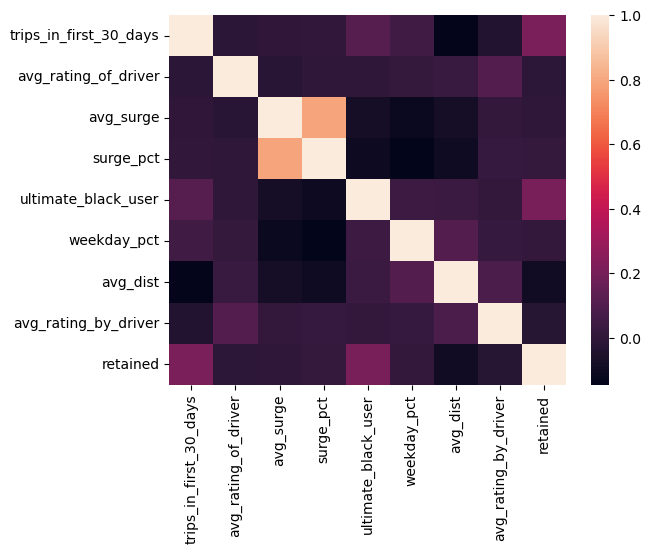

In [54]:
fig = plt.figure()
ax = plt.subplot(111)
ax = sns.heatmap(df2.corr())
plt.show()

In [60]:
df2.corr()['retained'].sort_values(ascending=False)

/var/folders/j5/np658np12vl9nkcgdxj9xmv00000gn/T/ipykernel_2299/3657763797.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()['retained'].sort_values(ascending=False)


retained                  1.000000
trips_in_first_30_days    0.210433
ultimate_black_user       0.205028
surge_pct                 0.011742
weekday_pct               0.009617
avg_surge                -0.003375
avg_rating_of_driver     -0.010770
avg_rating_by_driver     -0.026688
avg_dist                 -0.092847
Name: retained, dtype: float64

In [61]:
# one-hot encode categorical columns
df2_dum = pd.get_dummies(df2, columns=['city', 'phone'])
df2_dum.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0


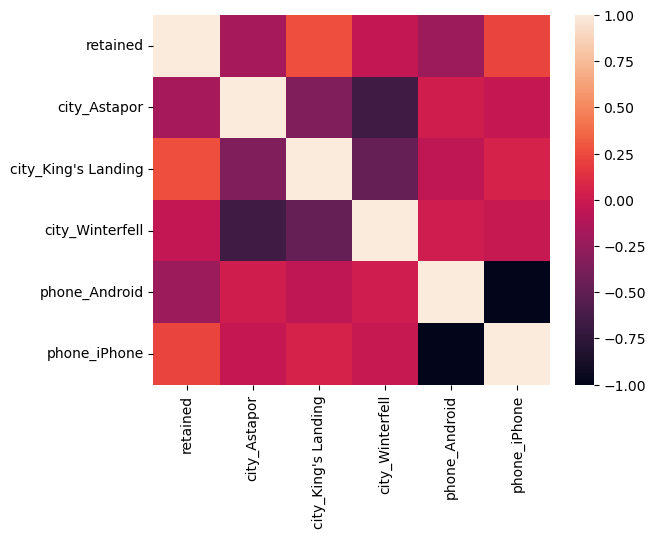

In [62]:
corr2 = df2_dum.iloc[:,-6:]
fig = plt.figure()
ax = plt.subplot(111)
ax = sns.heatmap(corr2.corr())
plt.show()

Not much correlation in the two heatmaps.  Even when comparing city, iphone to retention there does not appear to have any correlation.  When comparing all the features in the dataset vs retention there does not seem to be any correlation there as well. Trips in past 30 days and ultimate black users does show to have some correlation to retained users. 

In [63]:
y= df2['retained']

In [64]:
X = df2_dum

In [65]:
X = X.drop(columns=['signup_date','last_trip_date','retained'])

In [66]:
X.dtypes

trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
city_Astapor                uint8
city_King's Landing         uint8
city_Winterfell             uint8
phone_Android               uint8
phone_iPhone                uint8
dtype: object

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [68]:
# Making a Scaler object
scaler = StandardScaler()

In [69]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
#Using a range of max iteration values of 100, 500 ,100, apply the Logistic Regression classifier to classify the the data.
train_scores = []
max_iter =  [100, 500, 1000]
for i in max_iter:

    logreg= LogisticRegression(random_state = 42, max_iter=i)
    logreg.fit(X_train_scaled, y_train)
    
    train_scores.append(logreg.score(X_train,y_train))
    #test_scores.append(logreg.score(X_test_scaled, y_test))

#Print the train and test scores for each iteration.
    #print('Test Scores:',test_scores)
    print('Train Scores:',train_scores)

Train Scores: [0.6535977596159341]
Train Scores: [0.6535977596159341, 0.6535977596159341]
Train Scores: [0.6535977596159341, 0.6535977596159341, 0.6535977596159341]


/Users/sachinsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sachinsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sachinsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [71]:
#Identify the max iterations that resulted in the max score in the testing dataset.

max_train = max(train_scores)
indext = train_scores.index(max_train)
print('Max iterations for train =',max_iter[indext])

Max iterations for train = 100


In [72]:
logreg= LogisticRegression(random_state = 42, max_iter=max_iter[indext])
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [73]:
# Make predictions on the test data
y_pred = logreg.predict(X_test_scaled)

In [74]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[7976 1368]
 [2884 2770]]


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      9344
           1       0.67      0.49      0.57      5654

    accuracy                           0.72     14998
   macro avg       0.70      0.67      0.68     14998
weighted avg       0.71      0.72      0.71     14998



<Axes: >

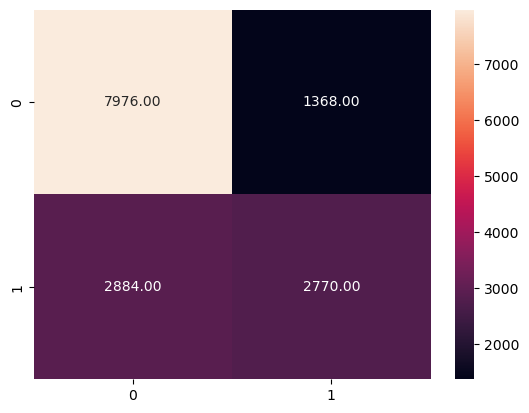

In [76]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt=".2F")

/Users/sachinsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


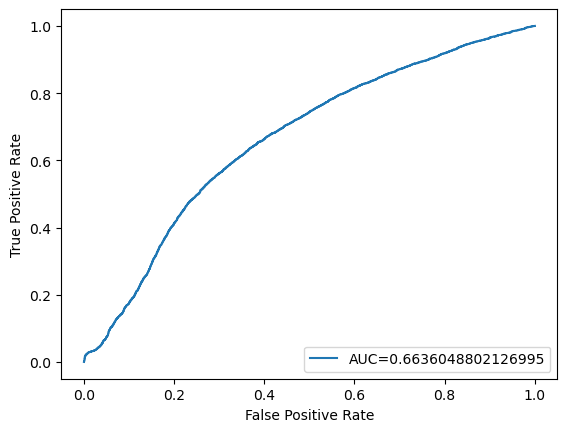

In [77]:
#define metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

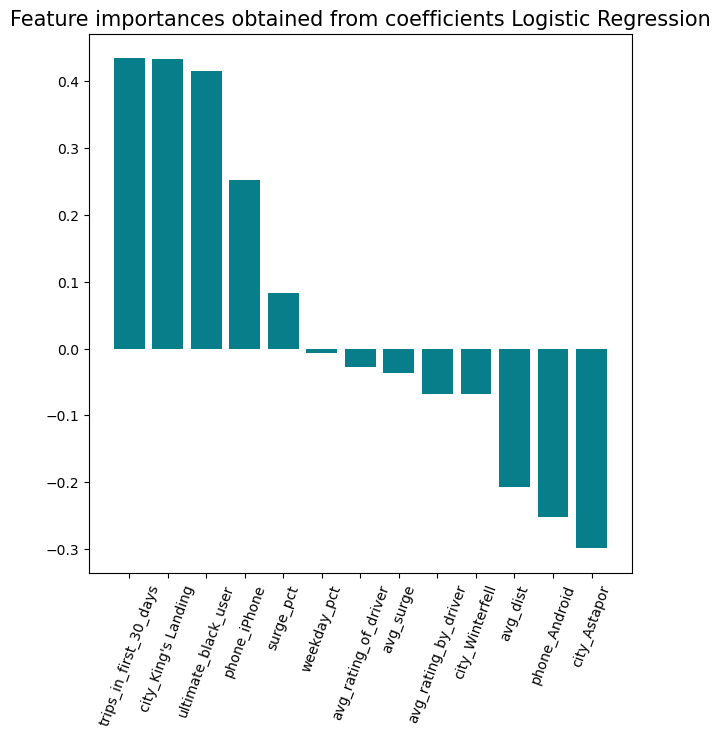

In [78]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False).head(30)
plt.figure(figsize=(7,7))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients Logistic Regression', size=15)
plt.xticks(rotation=70)
plt.show()

In [79]:
#Using Random Forest to determine hyperparameter tuning for n_estimators
train_scores = []
n_estimators =  [100, 500, 1000]
for i in n_estimators:

    forest = RandomForestClassifier(n_estimators = i, random_state=42)
    forest.fit(X_train, y_train)
    
    train_scores.append(forest.score(X_train,y_train))
    print('Train Scores:',train_scores)

Train Scores: [0.9968566039892554]
Train Scores: [0.9968566039892554, 0.9970280619534777]
Train Scores: [0.9968566039892554, 0.9970280619534777, 0.9970280619534777]


In [80]:
max_train = max(train_scores)
indext = train_scores.index(max_train)
print(indext)

1


In [81]:
forest = RandomForestClassifier(n_estimators = 500, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [82]:
# Make predictions on the test data and evaluate the model
predictions = forest.predict(X_test)
accuracy = forest.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.754300573409788


In [83]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print(cm)

[[7554 1790]
 [1895 3759]]


<Axes: >

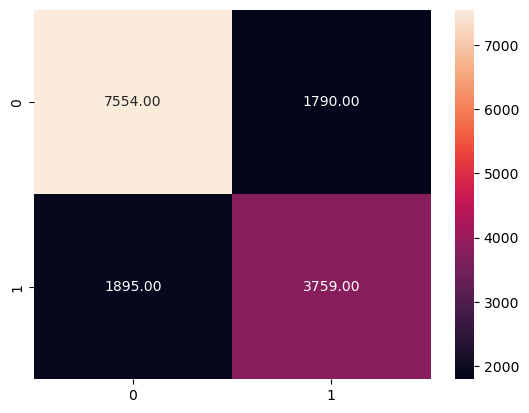

In [84]:
sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt=".2F")

In [85]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      9344
           1       0.68      0.66      0.67      5654

    accuracy                           0.75     14998
   macro avg       0.74      0.74      0.74     14998
weighted avg       0.75      0.75      0.75     14998



13


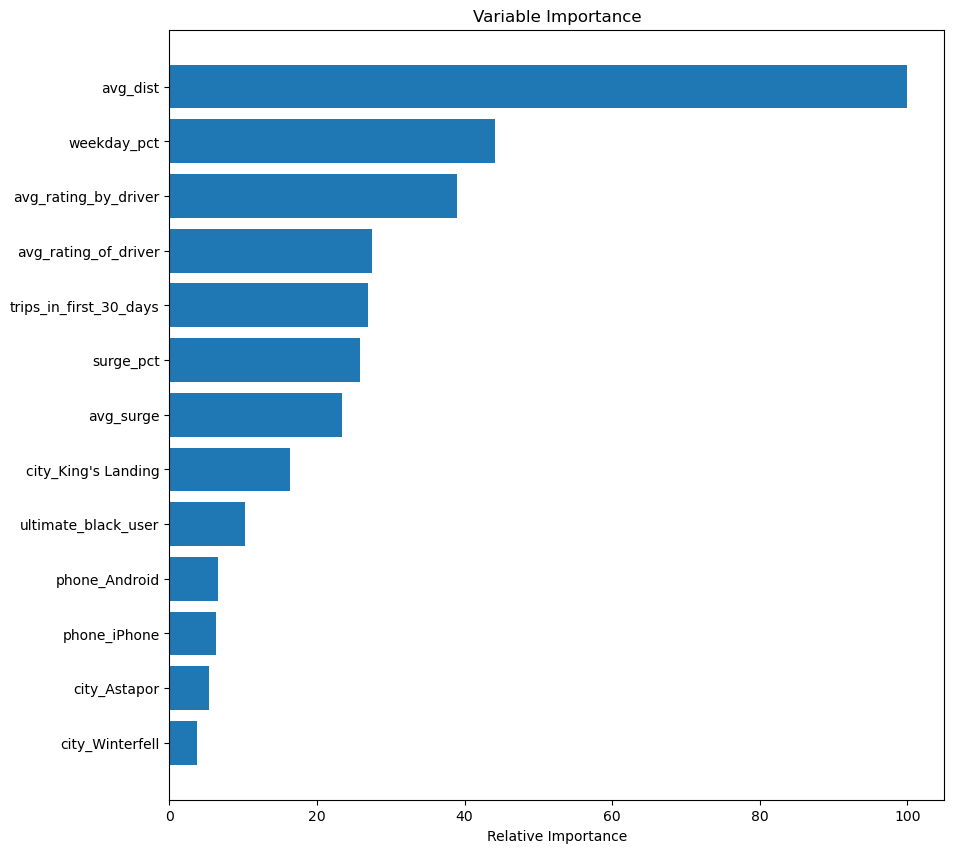

In [86]:
feature_importance = forest.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

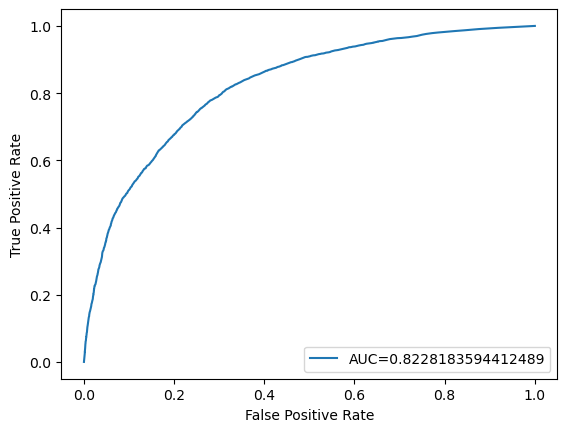

In [87]:
#define metrics
y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The Random Forrest model did perform better compared to the Logistic Regression based on accuracy and AUC scores.  Based on this information, I would advise that the following would be helpful in predicting whether a rider would be retained:
1) The average distance in miles per trip taken in the first 30 days after signup.
2) Percent of the user’s trips occurring during a weekday
3) Average rating by driver. 
